In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pyrenn
sns.set(style='ticks')
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.interpolate import griddata
from scipy.stats import spearmanr
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from pickle import load
import matplotlib.gridspec as gridspec


import ast
import sys
sys.path.append('../machine-scientist/')
sys.path.append('../machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par

In [9]:
#Figure settings
#--------------------------------
output_path='../../results/tutorial/' #A path to save figure
extensions=['.svg', '.png']     #Extensions to save figure
#Define figure size in cm
cm = 1/2.54 #convert inch to cm
width = 8*cm; height=6*cm 
#--------------------------------

#Fonts, sizes, and ticks  
#--------------------------------
size_axis=16;size_ticks=12;size_title=5
line_w=1.5;marker_s=3
#--------------------------------

#limits ann functions
#--------------------------------
xtick_labels=[-2, 0, 2 ];ytick_labels=[ 0, 0.5, 1.0]
xmin=-2.04;xmax=2.04;ymin=-0.09;ymax=1.01
#--------------------------------

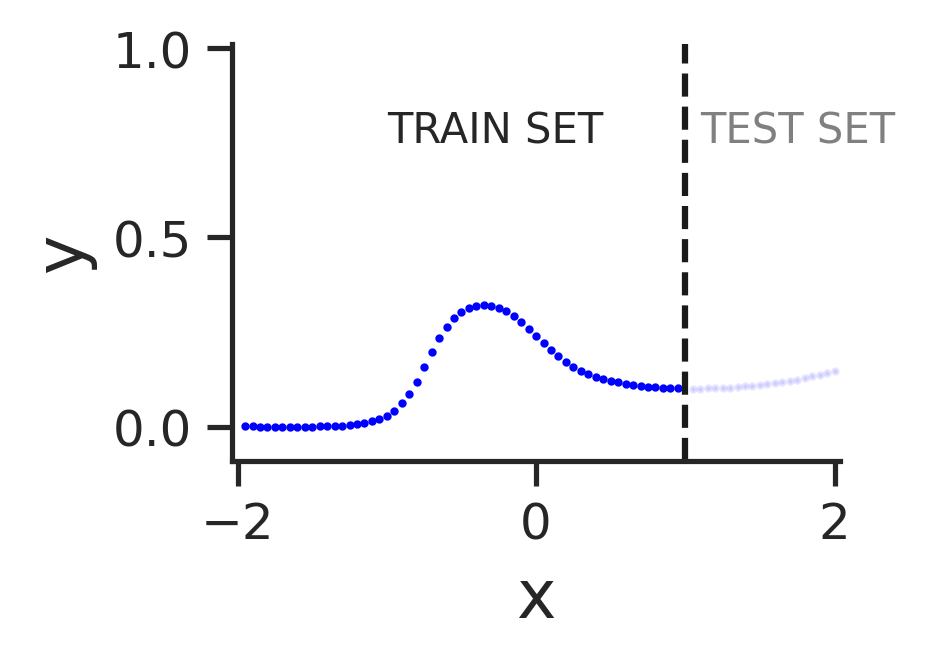

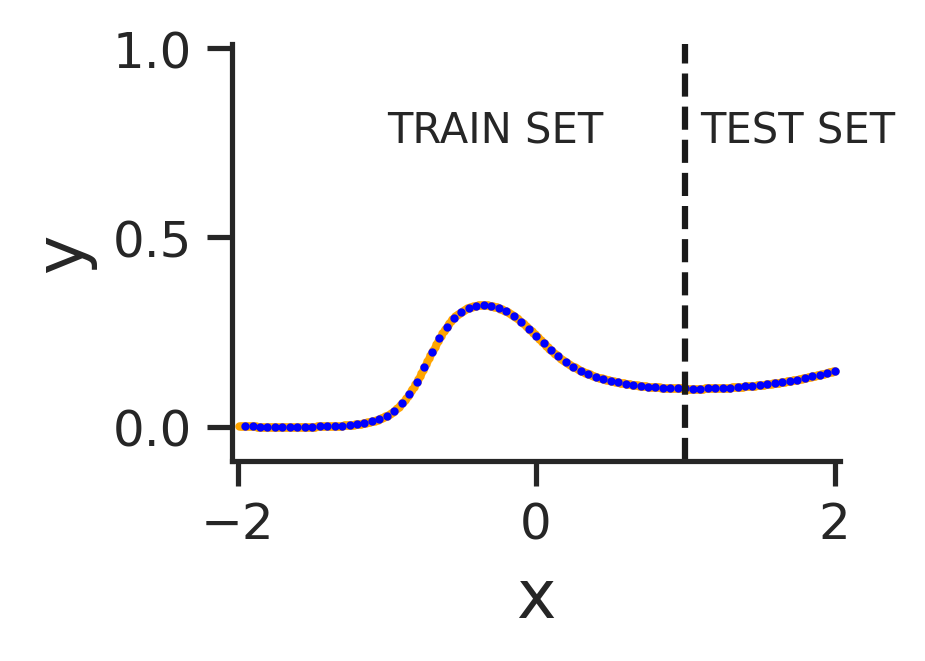

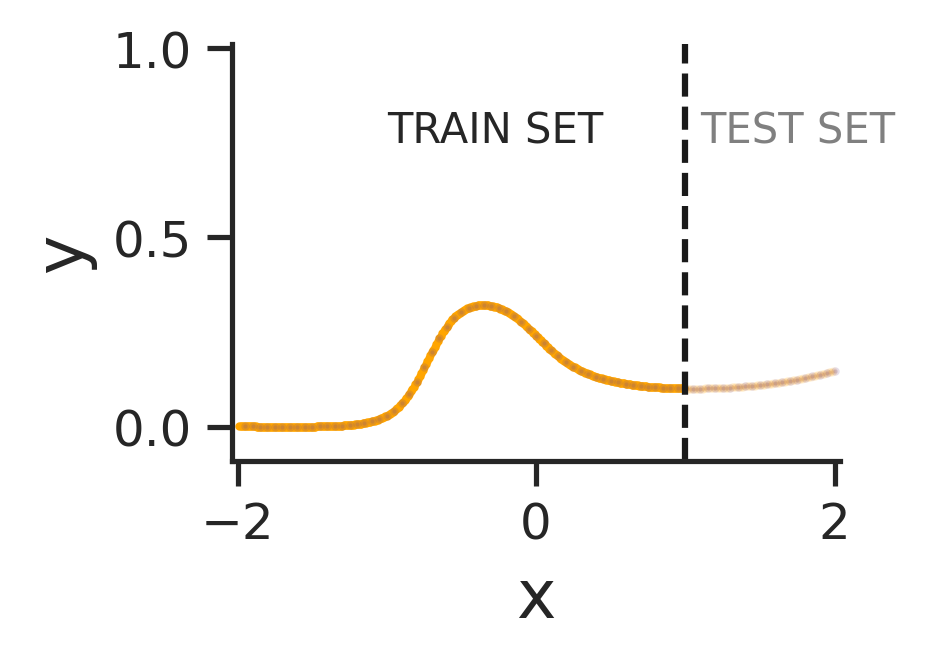

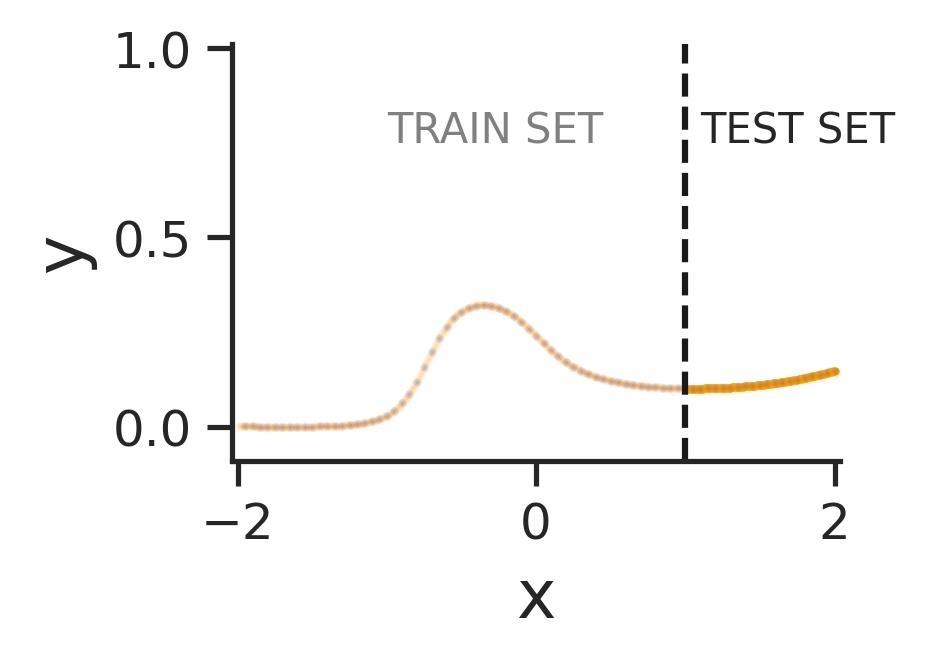

In [10]:
#Read ANN-generated data and model                                                                                        
activation_function='tanh'; 
n=7;sigma=0.0; realization=2  
file_data='NN_no_overfit_tanh_sigma_0.0_r_' + str(realization) + '.csv'
d='../../data/tutorial/' + file_data
d=pd.read_csv(d, index_col=0)
dn=d[d['rep']==n]
dn=dn[(dn['x1']>=-2.0) & (dn['x1']<=2.0)]

#Approximation, interpolation, extrapolation
train_size=60
train_border=dn.loc[train_size-1]['x1']

path='../../data/generative_data/'
file_high_res_data=path + 'NN_function_' + str(activation_function) + '_NREP_10_res_0.01_data'+ '.csv'
dhr=pd.read_csv(file_high_res_data)

dhrn=dhr[dhr['rep']==n]
dhrn=dhrn[(dhrn['x1']>=-2.0) & (dhrn['x1']<=2.0)]
dhrn.set_index('Unnamed: 0', inplace=True)
dhrn.index.name = None
dhrn=dhrn.reset_index(drop=True)
#display(dhrn)

#APPROXIMATION  
#-------------------------------------------------------------------------------
extensions=['.svg', '.png']     #Extensions to save figure
#Define figure size in cm
#cm = 1/2.54 #convert inch to cm
#width = 8*cm; height=6*cm 

#Fonts, sizes, and ticks  
#--------------------------------
size_axis=16;size_ticks=12;size_title=5
line_w=1.5;marker_s=3
#--------------------------------

#--------------------------------
fig=figure(figsize=(width,height), dpi=300) 

plt.plot(dn['x1'][:train_size-1], dn['y'][:train_size-1],'.', markersize=2, color='blue',alpha=1)
plt.plot(dn['x1'][train_size:], dn['y'][train_size:],'.', markersize=2, color='blue',alpha=0.1)

#plt.plot(dn['x1'], dn['y'],'.', markersize=2, color='blue')
plt.text(-1, 0.75, 'TRAIN SET', fontsize=10)
plt.text(1.1, 0.75, 'TEST SET', fontsize=10, color='gray')
plt.axvline(x=train_border,linestyle='--',linewidth=line_w, color='k')

plt.xlabel('x',fontsize=size_axis);plt.ylabel("y",fontsize=size_axis)
plt.xticks(xtick_labels, fontsize=size_ticks);plt.yticks(ytick_labels, fontsize=size_ticks)
plt.xlim(xmin,xmax);plt.ylim(ymin,ymax) 

sns.despine(top=True, right=True)
fig.tight_layout()

namefig='approximation'
for ext in extensions:
        plt.savefig(output_path + namefig +ext,dpi=300)
plt.show()
#-------------------------------------------------------------------------------

#INTERPOLATION+EXTRAPOLATION - 1
#-------------------------------------------------------------------------------
fig=figure(figsize=(width,height), dpi=300)
plt.xlabel('x',fontsize=size_axis);plt.ylabel("y",fontsize=size_axis)
plt.xticks(xtick_labels, fontsize=size_ticks);plt.yticks(ytick_labels, fontsize=size_ticks)
plt.xlim(xmin,xmax);plt.ylim(ymin,ymax) 

plt.plot(dhrn['x1'], dhrn['y'],'.', markersize=2, color='orange')#,label='observed data') 
plt.plot(dn['x1'], dn['y'],'.', markersize=2, color='blue',alpha=1)
plt.axvline(x=train_border,linestyle='--',linewidth=line_w, color='k')

plt.text(-1, 0.75, 'TRAIN SET', fontsize=10)
plt.text(1.1, 0.75, 'TEST SET', fontsize=10)

sns.despine(top=True, right=True)
fig.tight_layout()

namefig='interpolation_extrapolation'

for ext in extensions:
        plt.savefig(output_path + namefig +ext,dpi=300)

plt.show()

#INTERPOLATION+EXTRAPOLATION - 1
#-------------------------------------------------------------------------------
fig=figure(figsize=(width,height), dpi=300)
plt.xlabel('x',fontsize=size_axis);plt.ylabel("y",fontsize=size_axis)
plt.xticks(xtick_labels, fontsize=size_ticks);plt.yticks(ytick_labels, fontsize=size_ticks)
plt.xlim(xmin,xmax);plt.ylim(ymin,ymax) 

plt.plot(dhrn['x1'][:train_size*5-1], dhrn['y'][:train_size*5-1],'.', markersize=2, color='orange')
plt.plot(dhrn['x1'][train_size*5:], dhrn['y'][train_size*5:],'.', markersize=2, color='orange',alpha=0.1)

plt.plot(dn['x1'], dn['y'],'.', markersize=2, color='blue',alpha=0.1)
plt.axvline(x=train_border,linestyle='--',linewidth=line_w, color='k')

plt.text(-1, 0.75, 'TRAIN SET', fontsize=10)
plt.text(1.1, 0.75, 'TEST SET', fontsize=10, color='gray')

sns.despine(top=True, right=True)
fig.tight_layout()

namefig='interpolation'

for ext in extensions:
        plt.savefig(output_path + namefig +ext,dpi=300)

plt.show()

#EXTRAPOLATION
#-------------------------------------------------------------------------------
fig=figure(figsize=(width,height), dpi=300)
plt.xlabel('x',fontsize=size_axis);plt.ylabel("y",fontsize=size_axis)
plt.xticks(xtick_labels, fontsize=size_ticks);plt.yticks(ytick_labels, fontsize=size_ticks)
plt.xlim(xmin,xmax);plt.ylim(ymin,ymax) 

plt.plot(dhrn['x1'][:train_size*5-1], dhrn['y'][:train_size*5 -1],'.', markersize=2, color='orange', alpha=0.1) 
plt.plot(dhrn['x1'][train_size*5:], dhrn['y'][train_size*5:],'.', markersize=2, color='orange') 
plt.plot(dn['x1'], dn['y'],'.', markersize=2, color='blue',alpha=0.1)
plt.axvline(x=train_border,linestyle='--',linewidth=line_w, color='k')

plt.text(-1, 0.75, 'TRAIN SET', fontsize=10,color='gray')
plt.text(1.1, 0.75, 'TEST SET', fontsize=10)

sns.despine(top=True, right=True)
fig.tight_layout()

namefig='extrapolation'

for ext in extensions:
        plt.savefig(output_path + namefig +ext,dpi=300)

plt.show()